In [66]:
using JLD2, FileIO, Printf

In [3]:
using Plots
pyplot()

Plots.PyPlotBackend()

In [70]:
@load "table3_1.jld2" time1_m1 time1_m2 time1_m3 iters
@load "table3_2.jld2" time2_m1 time2_m2 time2_m3

3-element Array{Symbol,1}:
 :time2_m1
 :time2_m2
 :time2_m3

In [71]:
ns = [256, 512, 1024]

3-element Array{Int64,1}:
  256
  512
 1024

In [72]:
time1_m1 ./= iters 
time1_m2 ./= iters 
time1_m3 ./= iters 
time2_m1 ./= iters 
time2_m2 ./= iters 
time2_m3 ./= iters

3×3 Array{Float64,2}:
 2.03777  1.85493  1.81271
 3.97102  3.66528  3.56411
 7.91013  7.28373  7.1079 

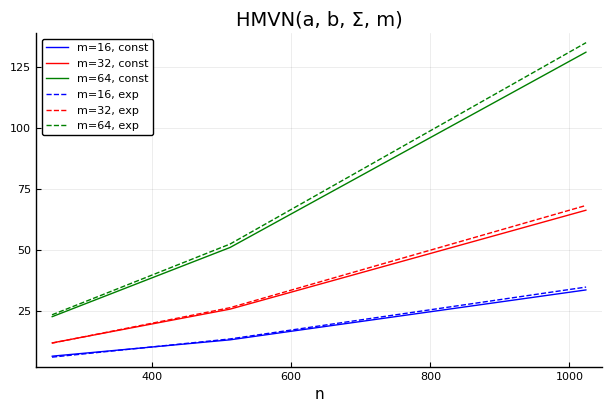

In [73]:
# for M1
plot1 = Plots.plot(ns, time1_m1[1,:], label = "m=16, const", linecolor = "blue", xlab = "n", title = "HMVN(a, b, Σ, m)")
Plots.plot!(plot1, ns, time1_m1[2,:], label = "m=32, const", linecolor = "red")
Plots.plot!(plot1, ns, time1_m1[3,:], label = "m=64, const", linecolor = "green")
Plots.plot!(plot1, ns, time2_m1[1, :], label = "m=16, exp", linestyle = :dash, linecolor = "blue")
Plots.plot!(plot1, ns, time2_m1[2,:], label = "m=32, exp", linestyle = :dash, linecolor = "red")
Plots.plot!(plot1, ns, time2_m1[3,:], label = "m=64, exp", linestyle = :dash, linecolor = "green")
savefig("table3_m1.pdf")

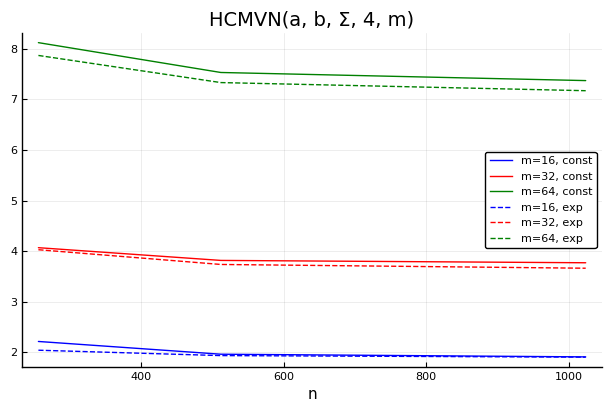

In [74]:
# for M2
plot2 = Plots.plot(ns, time1_m2[1,:], label = "m=16, const", linecolor = "blue", 
    xlab = "n", title = "HCMVN(a, b, Σ, 4, m)")
Plots.plot!(plot2, ns, time1_m2[2,:], label = "m=32, const", linecolor = "red")
Plots.plot!(plot2, ns, time1_m2[3,:], label = "m=64, const", linecolor = "green")
Plots.plot!(plot2, ns, time2_m2[1, :], label = "m=16, exp", linestyle = :dash, linecolor = "blue")
Plots.plot!(plot2, ns, time2_m2[2,:], label = "m=32, exp", linestyle = :dash, linecolor = "red")
Plots.plot!(plot2, ns, time2_m2[3,:], label = "m=64, exp", linestyle = :dash, linecolor = "green")
savefig("table3_m2.pdf")

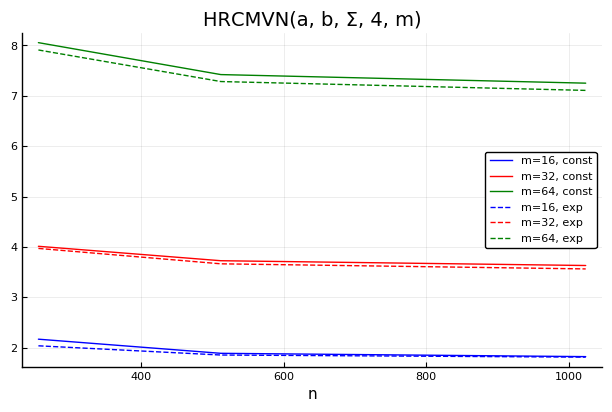

In [75]:
# for M3
plot3 = Plots.plot(ns, time1_m3[1,:], label = "m=16, const", linecolor = "blue", 
    xlab = "n", title = "HRCMVN(a, b, Σ, 4, m)")
Plots.plot!(plot3, ns, time1_m3[2,:], label = "m=32, const", linecolor = "red")
Plots.plot!(plot3, ns, time1_m3[3,:], label = "m=64, const", linecolor = "green")
Plots.plot!(plot3, ns, time2_m3[1, :], label = "m=16, exp", linestyle = :dash, linecolor = "blue")
Plots.plot!(plot3, ns, time2_m3[2,:], label = "m=32, exp", linestyle = :dash, linecolor = "red")
Plots.plot!(plot3, ns, time2_m3[3,:], label = "m=64, exp", linestyle = :dash, linecolor = "green")
savefig("table3_m3.pdf")

In [18]:
iters = 20
# ns = [512, 1024, 2048]
ns = [256, 512, 1024]
ms = [16, 32, 64]
d = 4

4

In [50]:
rel_error1_m1 = [0.0821885  0.0711093  0.0866144
 0.0894406  0.078757   0.0667966
 0.10583    0.0804581  0.0977669]

3×3 Array{Float64,2}:
 0.0821885  0.0711093  0.0866144
 0.0894406  0.078757   0.0667966
 0.10583    0.0804581  0.0977669

In [51]:
rel_error1_m2 = [ 0.0837014  0.070794   0.0859982
 0.08914    0.0776718  0.0660967
 0.10583    0.0826166  0.099097 ]

3×3 Array{Float64,2}:
 0.0837014  0.070794   0.0859982
 0.08914    0.0776718  0.0660967
 0.10583    0.0826166  0.099097 

In [52]:
rel_error1_m3 = [0.0850785  0.0710236  0.0869805
 0.0951403  0.0792406  0.0699556
 0.106798   0.0794499  0.0963232]

3×3 Array{Float64,2}:
 0.0850785  0.0710236  0.0869805
 0.0951403  0.0792406  0.0699556
 0.106798   0.0794499  0.0963232

In [67]:
print("M1 ")
for i in 1:3
    for j in 1:3
        @printf("& %.2f", 100*rel_error1_m1[i,j])
        print("\\% ")
    end
end
println("\\\\")
print("M2 ")
for i in 1:3
    for j in 1:3
        @printf("& %.2f", 100*rel_error1_m2[i,j])
        print("\\% ")
    end
end
println("\\\\")
print("M3 ")
for i in 1:3
    for j in 1:3
        @printf("& %.2f", 100*rel_error1_m3[i,j])
        print("\\% ")
    end
end

M1 & 8.22\% & 7.11\% & 8.66\% & 8.94\% & 7.88\% & 6.68\% & 10.58\% & 8.05\% & 9.78\% \\
M2 & 8.37\% & 7.08\% & 8.60\% & 8.91\% & 7.77\% & 6.61\% & 10.58\% & 8.26\% & 9.91\% \\
M3 & 8.51\% & 7.10\% & 8.70\% & 9.51\% & 7.92\% & 7.00\% & 10.68\% & 7.94\% & 9.63\% 

In [68]:
rel_error2_m1 = [ 0.0286787   3.35736e-5  0.000112699
 0.00067124  0.0130732   3.83937e-6 
 0.0264869   0.00270392  0.00570164 ]

rel_error2_m2 = [0.0328171    6.27471e-5  0.00898169 
 0.000727088  0.0130737   0.000135329
 0.0264869    0.00283975  0.00570865 ]

rel_error2_m3 = [0.0473321  0.000887856  0.0211089 
 0.0217473  0.019022     0.00160444
 0.0372486  0.0125284    0.00657814]

3×3 Array{Float64,2}:
 0.0473321  0.000887856  0.0211089 
 0.0217473  0.019022     0.00160444
 0.0372486  0.0125284    0.00657814

In [69]:
print("M1 ")
for i in 1:3
    for j in 1:3
        @printf("& %.2f", 100*rel_error2_m1[i,j])
        print("\\% ")
    end
end
println("\\\\")
print("M2 ")
for i in 1:3
    for j in 1:3
        @printf("& %.2f", 100*rel_error2_m2[i,j])
        print("\\% ")
    end
end
println("\\\\")
print("M3 ")
for i in 1:3
    for j in 1:3
        @printf("& %.2f", 100*rel_error2_m3[i,j])
        print("\\% ")
    end
end

M1 & 2.87\% & 0.00\% & 0.01\% & 0.07\% & 1.31\% & 0.00\% & 2.65\% & 0.27\% & 0.57\% \\
M2 & 3.28\% & 0.01\% & 0.90\% & 0.07\% & 1.31\% & 0.01\% & 2.65\% & 0.28\% & 0.57\% \\
M3 & 4.73\% & 0.09\% & 2.11\% & 2.17\% & 1.90\% & 0.16\% & 3.72\% & 1.25\% & 0.66\% 